# Importing the packages and the dataset

# Business Problem
Checking Network Attacks on a Sampled Telecom Dataset. The labels are imbalanced.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import seaborn as sns

import dask.dataframe as dd

In [4]:
from __future__ import print_function
import sklearn
import sklearn.datasets
import sklearn.ensemble
import lime
import lime.lime_tabular

In [5]:
train = pd.read_csv('small_new_train.csv')

In [6]:
print(train.shape)

(73205, 43)


In [7]:
pd.set_option('display.max_columns', 50)

train.head()

,Duration,Protocol_type,Service,Flag,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,768,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,114,0.45,0.02,0.45,0.00,0.00,0.00,0.00,0.0,0.0,20
1,0,udp,domain_u,SF,44,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5,0.0,0.0,0.0,0.0,0.67,0.67,0.60,255,249,0.98,0.01,0.01,0.00,0.00,0.00,0.00,0.0,0.0,21
2,4,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,1.0,1.0,1.00,0.00,0.00,130,1,0.01,0.05,0.01,0.00,0.00,0.00,0.01,1.0,0.0,8
3,0,tcp,http,SF,235,2088,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,4,255,1.00,0.00,0.25,0.03,0.25,0.01,0.00,0.0,0.0,20
4,0,tcp,http,SF,333,4591,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,11,0.0,0.0,0.0,0.0,1.00,0.00,0.36,13,255,1.00,0.00,0.08,0.04,0.00,0.00,0.00,0.0,0.0,21


In [8]:
# Lets have a look at the attack column which is the target column to be predicted

train.iloc[:,-2].value_counts()

0.0    67342
1.0     5863
Name: attack, dtype: int64

# Exploratory Data Analysis

In [14]:
import pandas_profiling

reports1=pandas_profiling.ProfileReport(train)

In [15]:
reports1.to_file('train_merge_EDA.html')

In this report we are able to see that there is strong correlation between a lot of columns.  <br>
If this were a regression problem these columns are bad and needed to be dropped. But this is a classification columns.

In [16]:
# Checking the data types and missing values

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73205 entries, 0 to 73204
Data columns (total 43 columns):
Duration                       73205 non-null int64
Protocol_type                  73205 non-null object
Service                        73205 non-null object
Flag                           73205 non-null object
Src_bytes                      73205 non-null int64
Dst_bytes                      73205 non-null int64
Land                           73205 non-null int64
Wrong_fragment                 73205 non-null int64
Urgent                         73205 non-null int64
Hot                            73205 non-null int64
Num_failed_logins              73205 non-null int64
Logged_in                      73205 non-null int64
Num_compromised                73205 non-null int64
Root_shell                     73205 non-null int64
Su_attempted                   73205 non-null int64
Num_root                       73205 non-null int64
Num_file_creations             73205 non-null int64
Num_

**There are no null values.**

In [13]:
# Lets separate the categorical columns

cat_cols = ['Protocol_type','Service','Flag']

**Descriptive Analysis of the columns**

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Duration,73205.0,190.832498,1638.239163,0.0,0.00,0.00,0.00,42837.0
Src_bytes,73205.0,13033.497125,413340.378016,0.0,46.00,226.00,319.00,89581520.0
Dst_bytes,73205.0,4079.517150,65681.758577,0.0,43.00,334.00,1790.00,7028652.0
Land,73205.0,0.000137,0.011687,0.0,0.00,0.00,0.00,1.0
Wrong_fragment,73205.0,0.004248,0.110737,0.0,0.00,0.00,0.00,3.0
Urgent,73205.0,0.000137,0.016528,0.0,0.00,0.00,0.00,3.0
Hot,73205.0,0.226159,2.284047,0.0,0.00,0.00,0.00,77.0
Num_failed_logins,73205.0,0.001352,0.049980,0.0,0.00,0.00,0.00,4.0
Logged_in,73205.0,0.656335,0.474934,0.0,0.00,1.00,1.00,1.0
Num_compromised,73205.0,0.467851,31.405322,0.0,0.00,0.00,0.00,7479.0


There are 39 numeric columns. <br>
A lot of them are binary and a few have numeric values.  <br>
Lets have a look at their correlation plot. 

In [19]:
# pd.set_option('display.max_columns', 50)
corr_matrix = train.corr()
corr_matrix

,Duration,Src_bytes,Dst_bytes,Land,Wrong_fragment,Urgent,Hot,Num_failed_logins,Logged_in,Num_compromised,Root_shell,Su_attempted,Num_root,Num_file_creations,Num_shells,Num_access_files,Num_outbound_cmds,Is_hot_login,Is_guest_login,Count,Srv_count,Serror_rate,Srv_serror_rate,Rerror_rate,Srv_rerror_rate,Same_srv_rate,Diff_srv_rate,Srv_diff_host_rate,Dst_host_count,Dst_host_srv_count,Dst_host_same_srv_rate,Dst_host_diff_srv_rate,Dst_host_same_src_port_rate,Dst_host_srv_diff_host_rate,Dst_host_serror_rate,Dst_host_srv_serror_rate,Dst_host_rerror_rate,Dst_host_srv_rerror_rate,attack,last_flag
Duration,1.000000,0.022335,0.040900,-0.001362,-0.004469,0.009954,0.003973,0.027771,-0.100656,0.089937,0.125035,0.183749,0.095875,0.209074,-0.002090,0.150796,NaN,-0.000320,-0.007922,-0.049914,-0.048930,-0.028633,-0.029414,0.109757,0.114998,-0.009955,0.051085,-0.051260,0.060366,-0.196378,-0.215477,0.356173,0.234687,-0.025011,-0.002479,-0.002894,0.071107,0.108773,0.046014,-0.089067
Src_bytes,0.022335,1.000000,0.360042,-0.000369,-0.001200,-0.000236,-0.001369,-0.000824,0.007713,-0.000423,-0.001146,-0.000934,-0.000461,-0.000581,-0.000505,-0.001488,NaN,-0.000115,-0.003300,-0.013535,-0.012912,-0.006215,-0.006041,-0.002856,-0.002886,0.008110,-0.000927,-0.009983,-0.002991,-0.040543,-0.039289,0.014874,0.018008,-0.003652,-0.004878,-0.006502,-0.002191,-0.002653,-0.000820,-0.031822
Dst_bytes,0.040900,0.360042,1.000000,-0.000726,-0.002383,0.024567,0.003185,0.059010,0.028427,0.102626,0.107173,0.098712,0.102605,0.015189,-0.001253,0.040240,NaN,0.000207,-0.002767,-0.024333,-0.021075,-0.000677,-0.001318,-0.013658,-0.013451,0.019439,-0.012017,-0.012342,-0.010242,-0.012493,-0.011812,-0.005227,-0.011404,-0.000322,0.008882,0.013105,-0.010504,-0.011658,-0.012912,-0.043641
Land,-0.001362,-0.000369,-0.000726,1.000000,-0.000448,-0.000097,-0.001157,-0.000316,-0.016153,-0.000174,-0.000510,-0.000375,-0.000189,-0.000384,-0.000268,-0.000624,NaN,-0.000043,-0.001310,-0.005186,-0.004834,0.048448,0.049065,-0.002917,-0.002942,0.003854,-0.002646,0.029327,-0.017422,-0.020222,0.007608,-0.003917,0.038480,0.102408,0.048745,0.035984,-0.003132,-0.003047,0.009470,-0.088096
Wrong_fragment,-0.004469,-0.001200,-0.002383,-0.000448,1.000000,-0.000317,-0.003799,-0.001038,-0.053018,-0.000572,-0.001673,-0.001230,-0.000621,-0.001261,-0.000878,-0.002049,NaN,-0.000142,-0.004299,0.012446,0.011750,0.001790,-0.009901,-0.009364,-0.009658,0.001816,-0.006688,-0.015351,0.028204,-0.046401,-0.052122,0.043378,0.020133,-0.009163,-0.005791,-0.009277,0.024304,-0.010002,0.130021,-0.110653
Urgent,0.009954,-0.000236,0.024567,-0.000097,-0.000317,1.000000,0.000267,0.132065,0.002500,0.037799,0.075579,0.111382,0.036587,0.027504,-0.000189,-0.000441,NaN,-0.000031,-0.000926,-0.003667,-0.003523,-0.002161,-0.002133,-0.002062,-0.002081,0.002725,-0.001871,-0.003718,-0.003967,-0.014423,-0.012426,0.000054,0.002625,0.013126,-0.001604,-0.001998,-0.002215,-0.002155,-0.002439,-0.003319
Hot,0.003973,-0.001369,0.003185,-0.001157,-0.003799,0.000267,1.000000,0.000193,0.070769,0.001927,0.010244,-0.000145,0.001537,0.030723,0.000120,-0.004826,NaN,0.001252,0.828375,-0.043682,-0.041932,-0.021741,-0.021869,-0.022305,-0.022237,0.022614,0.007196,-0.035558,-0.006453,-0.135304,-0.124182,0.023313,-0.032104,-0.029943,-0.021277,-0.020593,-0.018480,-0.020284,-0.006676,-0.069259
Num_failed_logins,0.027771,-0.000824,0.059010,-0.000316,-0.001038,0.132065,0.000193,1.000000,-0.012647,0.022633,0.042768,0.086821,0.021467,0.026229,-0.000619,0.000662,NaN,-0.000100,0.009315,-0.011937,-0.011530,-0.003463,-0.005765,0.007536,0.007467,0.005218,0.003142,-0.012172,-0.008321,-0.042730,-0.039821,0.011669,-0.008797,-0.001985,0.004212,0.002002,0.001164,0.000370,-0.001942,-0.079042
Logged_in,-0.100656,0.007713,0.028427,-0.016153,-0.053018,0.002500,0.070769,-0.012647,1.000000,0.010780,0.031561,0.023201,0.011714,0.023700,0.016566,0.038639,NaN,0.002674,0.079794,-0.484864,-0.389790,-0.280134,-0.283152,-0.320229,-0.315890,0.387956,-0.193279,0.104864,-0.269479,0.382550,0.3603

**Num_outbound_cmds** is empty column. We need to drop it.

**Let's check for any correlation in the data**

### Random 15 columns and make correlations

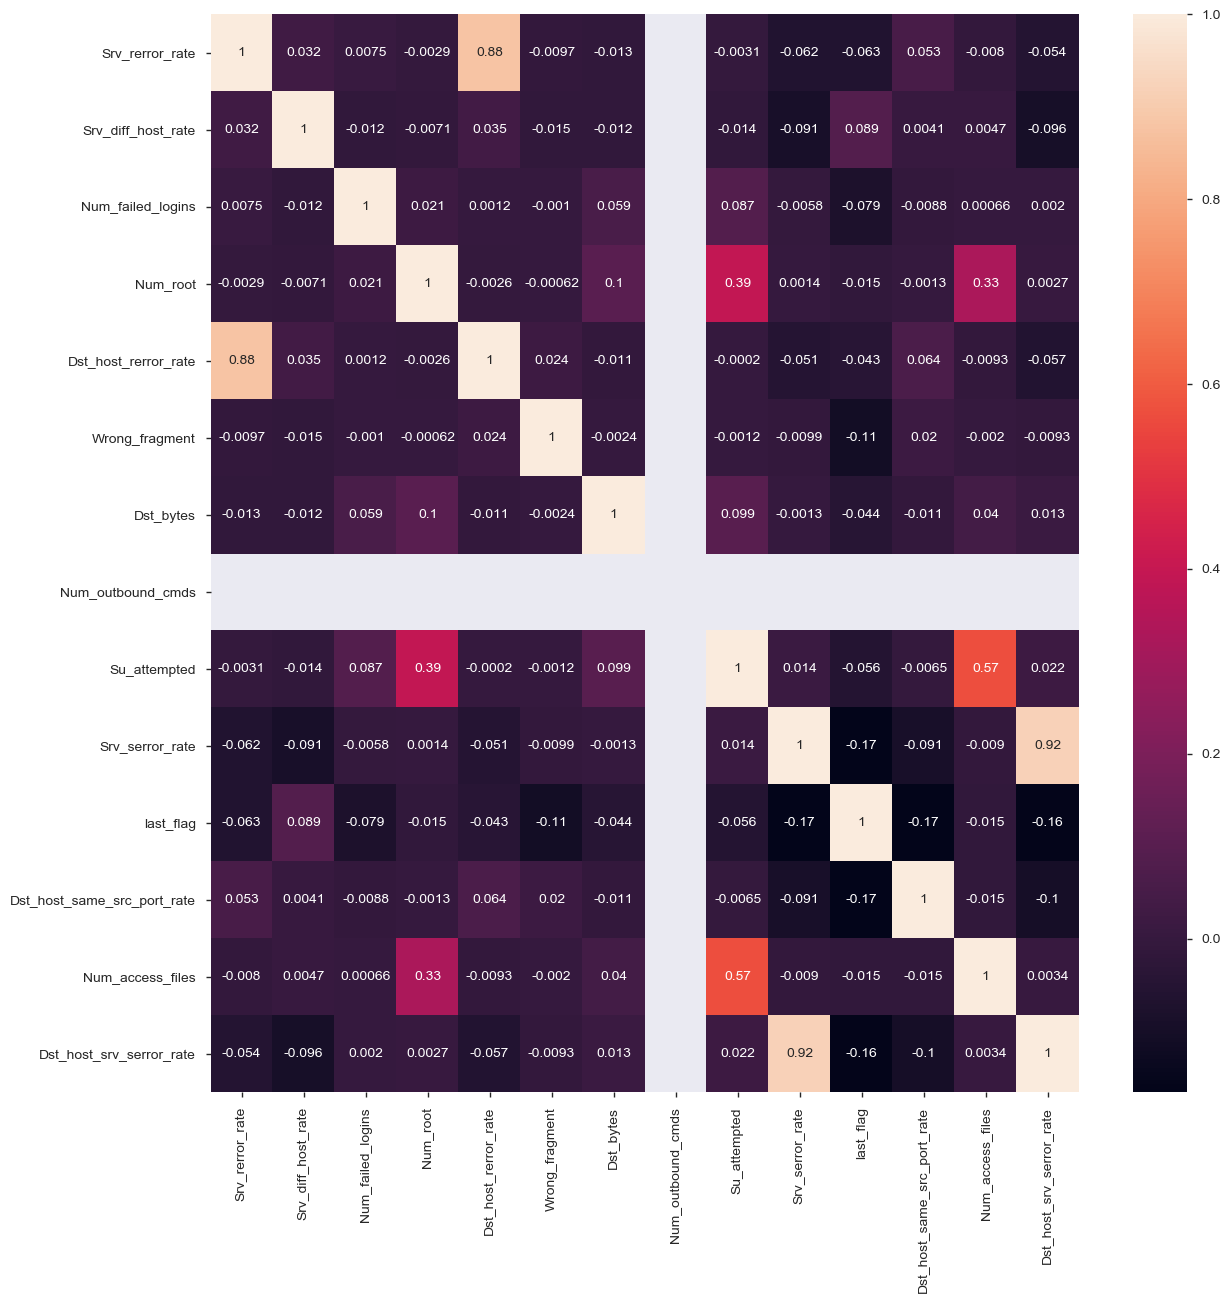

In [20]:
small_df = train.sample(15, axis=1)
small_corr_matrix = small_df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(small_corr_matrix, annot=True)

### Lets look at some strong correlations.

In [23]:
corr_threshold = 0.8

print("---------------CHECKING FOR CORRELATION------------")
for c in train.columns:
    for r in train.columns:
        if (r < c):
            if (c not in cat_cols) and (c is not 'attack') and (r not in cat_cols) and (r is not 'attack') :
                if abs(corr_matrix[r][c]) > corr_threshold:
                    print(c +" : "+ r+" : "+ str(corr_matrix[r][c]))

---------------CHECKING FOR CORRELATION------------
Num_root : Num_compromised : 0.9988443115174445
Is_guest_login : Hot : 0.828375192635162
Serror_rate : Dst_host_serror_rate : 0.8788906211702086
Serror_rate : Dst_host_srv_serror_rate : 0.902882970735803
Srv_serror_rate : Serror_rate : 0.9779742441572541
Srv_serror_rate : Dst_host_serror_rate : 0.8753639093843756
Srv_serror_rate : Dst_host_srv_serror_rate : 0.9182115264635042
Rerror_rate : Dst_host_rerror_rate : 0.8884325248968592
Rerror_rate : Dst_host_srv_rerror_rate : 0.9070891433172233
Srv_rerror_rate : Rerror_rate : 0.9851454996432637
Srv_rerror_rate : Dst_host_rerror_rate : 0.8777336386932482
Srv_rerror_rate : Dst_host_srv_rerror_rate : 0.90755815034085
Dst_host_srv_count : Dst_host_same_srv_rate : 0.8749179909598501
Dst_host_srv_serror_rate : Dst_host_serror_rate : 0.9307717583082044
Dst_host_srv_rerror_rate : Dst_host_rerror_rate : 0.8955491948788581


We have found the same insights as profiling report.  <br>  <br>

We are going to plot some of these correlations.

**Lets separate our attack and normal connections and store in a separate dataframe.**

In [9]:
y = train['attack']
y.unique()

array([0., 1.])

In [10]:
y.value_counts()

0.0    67342
1.0     5863
Name: attack, dtype: int64

## Plots

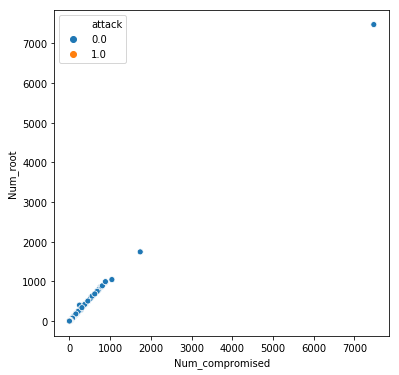

In [11]:
plt.figure(figsize=(6,6))
sns.scatterplot('Num_compromised','Num_root', data=train, hue=y)

C:\Users\Avinash\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


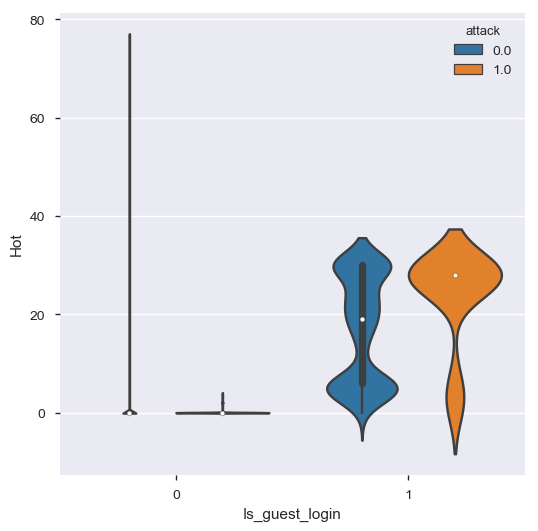

In [27]:
plt.figure(figsize=(6,6))
sns.violinplot('Is_guest_login', 'Hot', data=train, hue=y)

**Observation**: There are very few logins which are not guest.<br>
There are **guest logins** where **hot operations** are between 0-10 and 25-35 **are actually attack connections**.

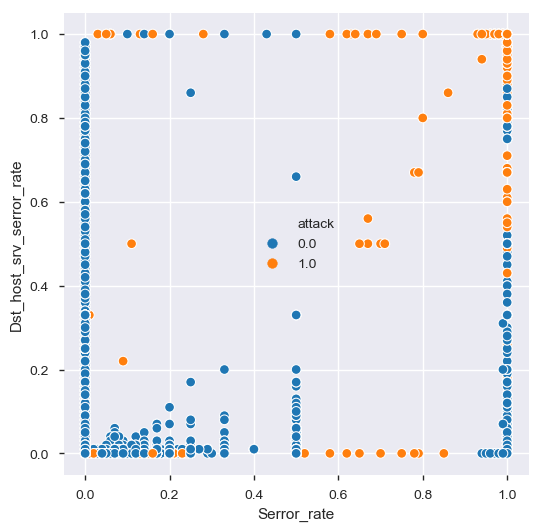

In [28]:
plt.figure(figsize=(6,6))
sns.scatterplot('Serror_rate', 'Dst_host_srv_serror_rate', data=train, hue=y)    

**Observation**: There are a lot of attacks happening.

In [29]:
np.unique(y[train['Serror_rate'] > 0.5], return_counts=True)

(array([0., 1.]), array([ 437, 3433], dtype=int64))

**Observation** : There are 8788 attacks when Serror_rate is greater than 0.5

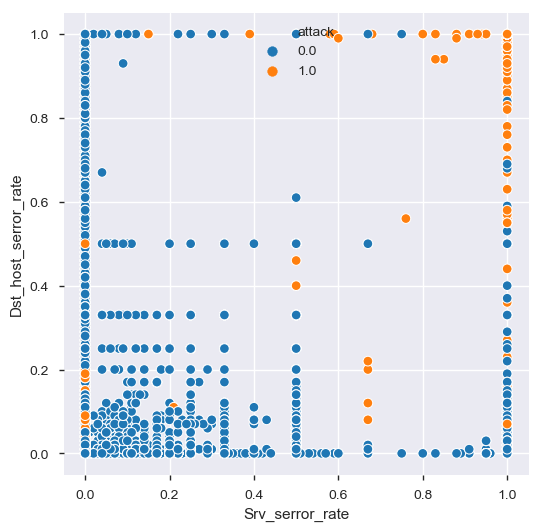

In [30]:
plt.figure(figsize=(6,6))
sns.scatterplot('Srv_serror_rate', 'Dst_host_serror_rate', data=train, hue=y)    

**Observation**: **Srv_serror_rate** and **Dst_host_serror_rate** are clear indicators of attacks happening or not.  <br>
Basically if I draw a diagonal line, it will separate most of the attacks. <br>
Equation of the classification line will be **Srv_serror_rate** + **Dst_host_serror_rate** = 1

In [31]:
np.unique(y[(train['Srv_serror_rate'] + train['Dst_host_serror_rate']) > 1], return_counts=True)

(array([0., 1.]), array([ 311, 3425], dtype=int64))

**Observation** : 8786 attacks and 311 normal conditions when Srv_serror_rate + Dst_host_serror_rate greater than 1.

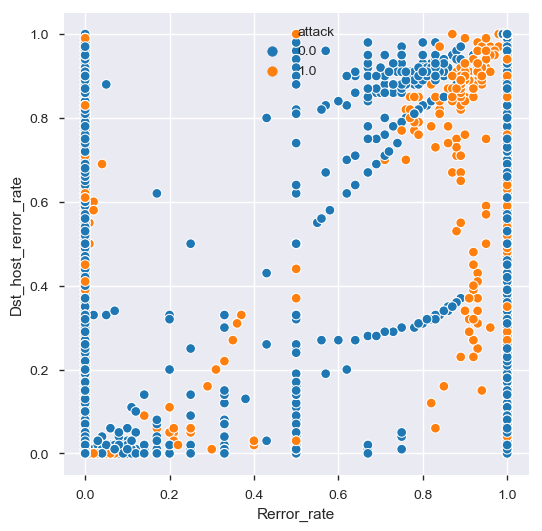

In [32]:
plt.figure(figsize=(6,6))
sns.scatterplot('Rerror_rate', 'Dst_host_rerror_rate', data=train, hue=y)    

**Observation**: Lots of attacks when **rerror_rate** greater than 0.5

In [33]:
y[train['Rerror_rate'] > 0.5].value_counts()
#np.unique(y[train['Rerror_rate'] > 0.5], return_counts=True)

0.0    2948
1.0    1224
Name: attack, dtype: int64

**Observation** : 3015 attacks and 2948 non attacks when rerror_rate greater than 0.5

Now we have done correlation plots and simple multivariate analysis to classify connections which are attack or normal.
Lets try to do this with machine learning algorithms.

# Handling Categorical Variables

In [14]:
encoded_cols = pd.get_dummies(train[cat_cols], drop_first=True)
encoded_cols.shape

(73205, 77)

In [15]:
train = pd.concat([train, encoded_cols], axis=1)
train.shape

(73205, 120)

# Creating Features and Labels

In [16]:
train.shape

(73205, 120)

In [17]:
X = train.drop(cat_cols, axis = 1)
X = X.drop(['attack', 'Num_outbound_cmds'], axis = 1)

In [18]:
X.shape

(73205, 115)

In [19]:
y = train['attack']
y.unique()

array([0., 1.])

In [20]:
# Lets create our train and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [21]:
# metrics

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, recall_score

In [22]:
def model_train(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name + " Validation Data")
    cm = confusion_matrix(y_test, y_pred)
    print(name +" Confusion Matrix " +" Validation Data")
    print(cm)
    print('-----------------------')
    cr = classification_report(y_test, y_pred)
    print(name +" Classification Report " +" Validation Data")
    print(cr)
    print('------------------------')
    print(name +" AUC Score " +" Validation Data")
    auc = roc_auc_score(y_test, y_pred)
    print("AUC Score " + str(auc))
    print(name +" Recall " +" Validation Data")
    rec = recall_score(y_test, y_pred)
    print("Recall "+ str(rec))
    
    return auc, rec



# Model Building

## Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 10, min_samples_leaf =3, random_state=101)

In [24]:
dt_auc, dt_rec = model_train(dt, "Decision Tree")

Decision Tree Validation Data
Decision Tree Confusion Matrix  Validation Data
[[13476    12]
 [   16  1137]]
-----------------------
Decision Tree Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13488
         1.0       0.99      0.99      0.99      1153

   micro avg       1.00      1.00      1.00     14641
   macro avg       0.99      0.99      0.99     14641
weighted avg       1.00      1.00      1.00     14641

------------------------
Decision Tree AUC Score  Validation Data
AUC Score 0.9926167386332421
Decision Tree Recall  Validation Data
Recall 0.9861231569817867


**The metric of our choice should be Recall as we want to minimize FN, which means that an attack accured but the model did not detect it.**

In [25]:
predict_fn_dt = lambda x: dt.predict_proba(x).astype(float)

feature_names = X.columns
print(feature_names)

Index(['Duration', 'Src_bytes', 'Dst_bytes', 'Land', 'Wrong_fragment',
       'Urgent', 'Hot', 'Num_failed_logins', 'Logged_in', 'Num_compromised',
       ...
       'Flag_REJ', 'Flag_RSTO', 'Flag_RSTOS0', 'Flag_RSTR', 'Flag_S0',
       'Flag_S1', 'Flag_S2', 'Flag_S3', 'Flag_SF', 'Flag_SH'],
      dtype='object', length=115)


## Naive Bayes Algorithm

In [45]:
# Naive Bayes Algorithm

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()

In [46]:
nb_auc, nb_rec = model_train(nb_clf, "Naive Bayes Classifier")

Naive Bayes Classifier Validation Data
Naive Bayes Classifier Confusion Matrix  Validation Data
[[12571   917]
 [  251   902]]
-----------------------
Naive Bayes Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96     13488
         1.0       0.50      0.78      0.61      1153

   micro avg       0.92      0.92      0.92     14641
   macro avg       0.74      0.86      0.78     14641
weighted avg       0.94      0.92      0.93     14641

------------------------
Naive Bayes Classifier AUC Score  Validation Data
AUC Score 0.8571603334537061
Naive Bayes Classifier Recall  Validation Data
Recall 0.782307025151778


## Random Forest Algorithm

In [47]:
# Random Forest Algorithm

from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators = 20, criterion='gini', max_depth = 10, min_samples_split=3, random_state=101)

In [48]:
rf_auc, rf_rec = model_train(rf_clf, "Random Forest Classifier")

Random Forest Classifier Validation Data
Random Forest Classifier Confusion Matrix  Validation Data
[[13487     1]
 [   23  1130]]
-----------------------
Random Forest Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13488
         1.0       1.00      0.98      0.99      1153

   micro avg       1.00      1.00      1.00     14641
   macro avg       1.00      0.99      0.99     14641
weighted avg       1.00      1.00      1.00     14641

------------------------
Random Forest Classifier AUC Score  Validation Data
AUC Score 0.9899889490925216
Random Forest Classifier Recall  Validation Data
Recall 0.9800520381613183


## XGBoost Classification

In [49]:
from xgboost.sklearn import XGBClassifier
xgb_clf = XGBClassifier(random_state=101)

In [50]:
xgb_auc, xgb_rec = model_train(xgb_clf, "XGBoost Classifier")

XGBoost Classifier Validation Data
XGBoost Classifier Confusion Matrix  Validation Data
[[13487     1]
 [   11  1142]]
-----------------------
XGBoost Classifier Classification Report  Validation Data
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13488
         1.0       1.00      0.99      0.99      1153

   micro avg       1.00      1.00      1.00     14641
   macro avg       1.00      1.00      1.00     14641
weighted avg       1.00      1.00      1.00     14641

------------------------
XGBoost Classifier AUC Score  Validation Data
AUC Score 0.9951927652243514
XGBoost Classifier Recall  Validation Data
Recall 0.9904596704249783


Let try some hyper-parameter tuning to improve XGBoost

## GridSearch on XGBoost

In [51]:
from sklearn.model_selection import GridSearchCV

xgb_gs_clf = XGBClassifier()                         
                        
param_grid = {"max_depth": [7,10],                 # Max depth of each learner (Decision Tree)
              "n_estimators": [50,70,100] ,        # Number of trees
              "gamma": [0.03],                     # Minimum reduction in loss(entropy) to make further branches
              "learning_rate": [0.08],             # Learning Rate
              "min_child_weight": [5],             # Minimum sum of instance weight (hessian) needed in a child
              "colsample_bytree": [0.8],           # Subsample ratio of columns when constructing each tree
              "subsample": [0.85]}                 # Subsample ratio of the training instance

grid_search = GridSearchCV(xgb_gs_clf, 
                           param_grid=param_grid,
                           cv = 2,
                           n_jobs=-1,
                           scoring='neg_log_loss',
                           verbose=2)

grid_search.fit(X_train,y_train)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:   26.4s remaining:   52.8s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   50.7s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [7, 10], 'n_estimators': [50, 70, 100], 'gamma': [0.03], 'learning_rate': [0.08], 'min_child_weight': [5], 'colsample_bytree': [0.8], 'subsample': [0.85]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_log_loss', verbose=2)

In [52]:
gs_y_pred = grid_search.predict(X_test)

In [53]:
# metrics

cm = confusion_matrix(y_test, gs_y_pred) 
print("Confusion Matrix GridSearchCV XGBoost")
print(cm)
print('-----------------------')
cr = classification_report(y_test, gs_y_pred)
print("Classification Report GridSearchCV XGBoost")
print(cr)
print('------------------------')
gs_auc = roc_auc_score(y_test, gs_y_pred)
print("AUC Score ", gs_auc)
print('------------------------')
gs_rec = recall_score(y_test, gs_y_pred)
print("Recall  ", gs_rec)

Confusion Matrix GridSearchCV XGBoost
[[13486     2]
 [   10  1143]]
-----------------------
Classification Report GridSearchCV XGBoost
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     13488
         1.0       1.00      0.99      0.99      1153

   micro avg       1.00      1.00      1.00     14641
   macro avg       1.00      1.00      1.00     14641
weighted avg       1.00      1.00      1.00     14641

------------------------
AUC Score  0.9955893465805332
------------------------
Recall   0.9913269731136166


In [54]:
print(grid_search.best_params_)

{'colsample_bytree': 0.8, 'gamma': 0.03, 'learning_rate': 0.08, 'max_depth': 10, 'min_child_weight': 5, 'n_estimators': 100, 'subsample': 0.85}


**Observation** : auc roc score of 0.998 which is the best model. <br>

# Conclusion

In [55]:
rec_scores = [dt_rec, nb_rec, rf_rec, xgb_rec, gs_rec]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(rec_scores))
print(list(zip(label, rec_scores)))

[('dt', 0.9861231569817867), ('nb', 0.782307025151778), ('rf', 0.9800520381613183), ('xgb', 0.9904596704249783), ('gs', 0.9913269731136166)]


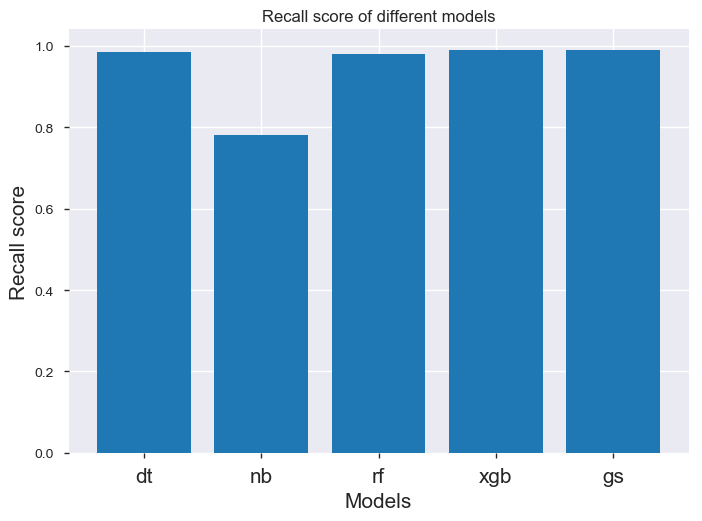

In [56]:
plt.bar(index, rec_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Recall score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Recall score of different models')
plt.show()

Grid Search XGBoost has provided the best accuracy score followed by Random Forest.

In [57]:
auc_scores = [dt_auc, nb_auc, rf_auc, xgb_auc, gs_auc]
label = ['dt', 'nb', 'rf', 'xgb', 'gs']
index = np.arange(len(auc_scores))
print(list(zip(label, auc_scores)))

[('dt', 0.9926167386332421), ('nb', 0.8571603334537061), ('rf', 0.9899889490925216), ('xgb', 0.9951927652243514), ('gs', 0.9955893465805332)]


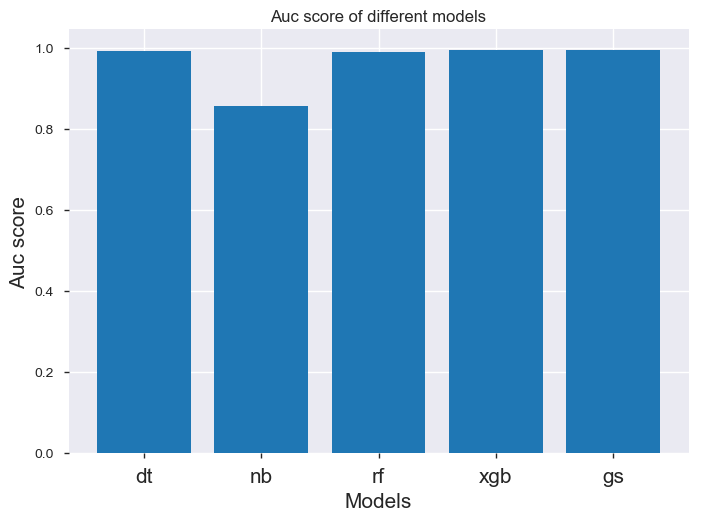

In [58]:
plt.bar(index, auc_scores)
plt.xlabel('Models', fontsize=15)
plt.ylabel('Auc score', fontsize=15)
plt.xticks(index, label, fontsize=15)
plt.title('Auc score of different models')
plt.show()

Grid Search XGBoost has provided the best auc score followed by Random Forest.